## 마스크 착용 상태 분류

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
Tesla V100-SXM2-32GB


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import cycler
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.nn.modules.pooling import MaxPool2d
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
# matplotlib 옵션 변경
raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

dark_palette = np.array(raw_dark_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

# cmap 수정
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color',dark_palette)

# 전체적인 배경색 수정
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

# 사용되는 텍스트 색상 흰색으로 수정
white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

#### 파일 이름 변경

In [ ]:
import os
from glob import glob
import pandas as pd
import shutil

def isFileChanged(file_path): # check if file changed based on last modified time 
    if os.path.getmtime(file_path) > 1614865992.0: 
        return True 

    return False

# def correct_mask_status(data_dir, invalid_list, correct_list):
#     print("="*50)
#     print("Change Mask Status")

#     for folder in invalid_list: 
#         image_dir = os.path.join(data_dir, folder)

#         incorrect_file = os.path.join(image_dir, correct_list[0])
#         normal_file = os.path.join(image_dir, correct_list[1])

#         if not isFileChanged(incorrect_file): #last modified time
#             temp = os.path.join(image_dir, correct_list[2])

#             os.rename(incorrect_file, temp)
#             os.rename(normal_file, incorrect_file)
#             os.rename(temp, normal_file)  # temp.jpg is not created in this folder

#             print("Changed File Names")

#         else :
#             print("Already Changed")
    
#     print("Process Done")



def change_incorrect_gender(incorrect, src, target): 
    changed_path = incorrect.replace(src, target)
    print(f"{incorrect.split('images/')[1]} is changing into {target}")
    shutil.move(incorrect, changed_path)


def correct_gender_status(data_dir, invalid_id_list): 
    df = pd.read_csv('/opt/ml/input/data/train/train.csv')

    path_list = [] # list that contains incorrect file path
    correct_gender_list = [] # list that contains correct gender of incorrect file path

    print("="*50)
    print("Change Gender Status")

    for path in df['path']:
        for pid in invalid_id_list:
            if pid in path:
                path_list.append(path)
                correct_gender_list.append("male" if "female" in path else "female")

    for idx, foldername in enumerate(path_list):
        folder_dir = os.path.join(data_dir, foldername)
        gender = correct_gender_list[idx]

        if gender == "male" and os.path.exists(folder_dir):
            change_incorrect_gender(folder_dir, "female", gender)

        elif gender=="female" and os.path.exists(folder_dir):
            change_incorrect_gender(folder_dir, "male", gender)

    print("Process Done")




# def readCurrentFolders(data_dir): # change age task should read current folders
#     return sorted(list(filter(lambda p:not p.startswith("."), os.listdir(data_dir))))    


# def correct_age_status(data_dir, invalid_age_id):
#     current_folders = readCurrentFolders(data_dir)
#     idx = 0 # for age dict

#     print("="*50)
#     print("Change Age Status")

#     for folder in current_folders: #sorted folders list
#         invalid_path = os.path.join(data_dir, folder)
#         invalid_age = folder.split("Asian_")[1]

#         if folder.split("_")[0] in invalid_age_id.keys():
#             correct_age = str(list(invalid_age_id.values())[idx])
#             correct_path = invalid_path.replace(invalid_age, correct_age)

#             print(f"{invalid_path.split('images/')[1]} is changing into {correct_path.split('images/')[1]}")
#             shutil.move(invalid_path, correct_path)

#             idx += 1


#     print("Process Done")


if __name__ == "__main__":
    data_dir= "/opt/ml/input/data/train/images"

    mask_status_invalid = ["000020_female_Asian_50", "004418_male_Asian_20", "005227_male_Asian_22"]
    mask_status_name = ["incorrect_mask.jpg", "normal.jpg", "temp.jpg"]

    gender_status_invalid = ["000225", "000664", "000767", "001498-1", "001509", "003113", "003223", "004281", 
    "004432", "005223", "006359", "006360","006361", "006362", "006363", "006364", "006424"]

#     age_status_invalid = {"001009" : 20, "001064": 20, "001637":20, "001666":20, "001852":20, "004348": 60}

#     correct_mask_status(data_dir, mask_status_invalid, mask_status_name)
    correct_gender_status(data_dir, gender_status_invalid) 
#     correct_age_status(data_dir, age_status_invalid)

In [24]:
os.path.getmtime("/opt/ml/input/data/train/images/000020_female_Asian_50/incorrect_mask.jpg")

1614865992.0

In [25]:
data_dir= "/opt/ml/input/data/train/images"
wrong_mask_files = ["000020_female_Asian_50", "004418_male_Asian_20", "005227_male_Asian_22"]
wrong_gender = ['000664','000725','000767','001049',]

file_names = ["incorrect_mask.jpg", "normal.jpg", "temp.jpg"]


for folder in wrong_mask_files:
    image_dir = os.path.join(data_dir, folder)

    incorrect_file = os.path.join(image_dir, file_names[0])
    print(incorrect_file)
    normal_file = os.path.join(image_dir, file_names[1])


    if os.path.getmtime(incorrect_file) == 1614865992.0: #last modified time
        temp = os.path.join(image_dir, file_names[2])


        os.rename(incorrect_file, temp)
        os.rename(normal_file, incorrect_file)
        os.rename(temp, normal_file)  # temp img is not created in this folder, only for rename

        print("Changed File Names")

    else :
        print("Already Changed")

/opt/ml/input/data/train/images/000020_female_Asian_50/incorrect_mask.jpg
Changed File Names
/opt/ml/input/data/train/images/004418_male_Asian_20/incorrect_mask.jpg
Already Changed
/opt/ml/input/data/train/images/005227_male_Asian_22/incorrect_mask.jpg
Already Changed


#### 데이터 불러오기

In [28]:
train_data_dir = '../input/data/train/train.csv'
train_images_dir = '../input/data/train/images/'
eval_dir = '../input/data/eval/images/info.csv'
eval_images_dir = '../input/data/eval/images/'
submission_dir = '../input/data/eval/info.csv'

In [29]:
train_df = pd.read_csv(train_data_dir)
train_df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


- 전체 4500 개의 데이터 중 60%(2700)만 학습에 사용하고, 20%(900)는 public dataset , 나머지 20%(900)는 private dataset으로 사용

In [30]:
train_df.shape

(2700, 5)

- 결측치 확인

In [31]:
train_df.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

- 고유키인 id 중복값 확인결과 "003397" 이 중복으로 확인

In [32]:
sum(train_df["id"].duplicated())

1

In [33]:
train_df[train_df["id"].duplicated()]

,id,gender,race,age,path
1367,003397,female,Asian,19,003397_female_Asian_19


#### 전처리
- 기존의 데이터가 id별 폴더안에 여러 마스크 이미지들이 들어있는 형식으로 되어있기 때문에, 이를 한번에 살펴보기 위한 전처리 수행
- id, gender, race, age, age_group, mask, image_path 컬럼을 가지는 데이터 프레임 생성
- gender : (0 = 남자), (1 = 여자)
- age_group : (0 = 30살 미만), (1 = 30살 이상 60살 미만) , (2 = 60살)
- mask : (0 = non-mask), (1 = inccorect), (2 = normal)

In [34]:
from glob import glob
import pandas as pd

# glob을 이용해 전체 image path 저장
train_image_path = glob('../input/data/train/images/*/*')


def preprocessing(images_path):
    # 빈 데이터 프레임 생성
    train_df = pd.DataFrame(columns=["id","gender","race","age","age_group","mask","image_path",'label'])
    
    # 각 이미지의 path를 통해 변수들 할당
    for img_path in images_path:
        split_list = img_path.split("/")
        file_name = split_list[-1]
        path = split_list[-2]

        path_split = path.split("_")
        id = path_split[0]
        gender = 0 if path_split[1] == "male" else 1
        race = path_split[2]
        age = int(path_split[3])
        age_group = 0 if age < 30 else 1 if 30 <= age < 60 else 2
        mask = 2 if "normal" in file_name else 1 if "incorrect" in file_name else 0
        label = mask*6 + gender*3 + age_group

        total = [id, gender, race, age,age_group,mask,img_path,label]
        train_df.loc[len(train_df)] = total
        
    return train_df

In [35]:
new_train_df = preprocessing(train_image_path)

#### 새롭게 생성한 데이터프레임 확인

In [36]:
new_train_df.head()

,id,gender,race,age,age_group,mask,image_path,label
0,004465,1,Asian,50,1,1,../input/data/train/images/004465_female_Asian...,10
1,004465,1,Asian,50,1,0,../input/data/train/images/004465_female_Asian...,4
2,004465,1,Asian,50,1,2,../input/data/train/images/004465_female_Asian...,16
3,004465,1,Asian,50,1,0,../input/data/train/images/004465_female_Asian...,4
4,004465,1,Asian,50,1,0,../input/data/train/images/004465_female_Asian...,4


In [37]:
new_train_df.shape

(18900, 8)

In [38]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18900 entries, 0 to 18899
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          18900 non-null  object
 1   gender      18900 non-null  object
 2   race        18900 non-null  object
 3   age         18900 non-null  object
 4   age_group   18900 non-null  object
 5   mask        18900 non-null  object
 6   image_path  18900 non-null  object
 7   label       18900 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [39]:
new_train_df.to_csv("../labeling_train.csv",index=False)

In [40]:
new_train_df["age"] = new_train_df["age"].astype("int64")

#### 변수 EDA
- 여자가 남자보다 약 4000명 정도 많게 나타나 보인다.
- 국적은 모두 Asian사람들이기에 제거해도 될 것 같다.
- age에서 30,40대가 적게 나타났지만, age와 age_group간 분포의 차이가 있어서 확인이 필요하다
- mask는 당연하게 정상적으로 착용한 사진 5장, 불완전하게 착용한 사진 1장, 쓰지 않은 사진 1장으로 나타났다. 

In [7]:
df = pd.read_csv("../input/data/train/labeling_train.csv")

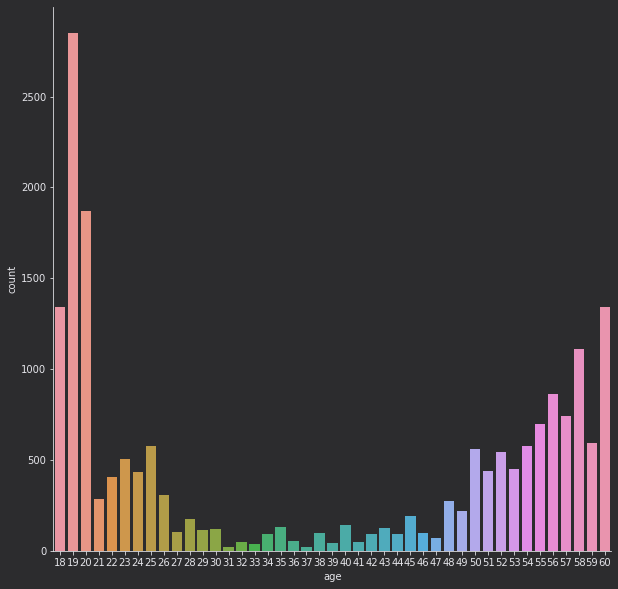

In [11]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
sns.countplot(x="age",data=df)
plt.show()

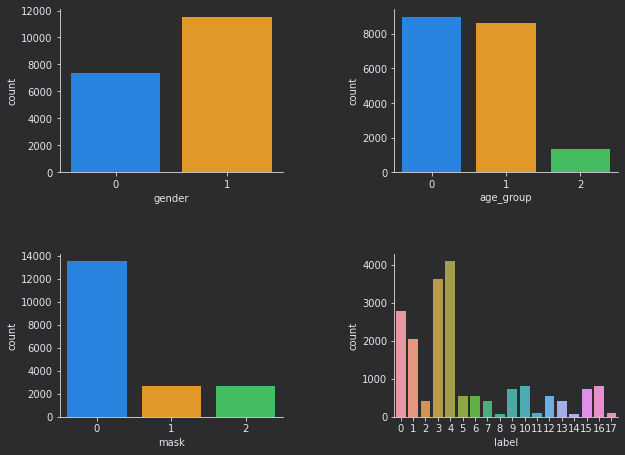

In [9]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

plt_list = ["gender","age_group","mask","label"]
for i in range(1,len(plt_list)+1):
    plt.subplot(3,2,i)
    sns.countplot(x=plt_list[i-1],data=df)

- age의 2 범주를 살펴본 결과 age의 최대값은 60이고, 60살만이 2 범주에 속하기 때문에 나타난 결과라고 생각된다.
- 따라서, age 1, 2 범주를 분류하기 쉽지 않아 보이며, 어떻게 특징을 잡아낼 것인지 고민할 필요가 있다.

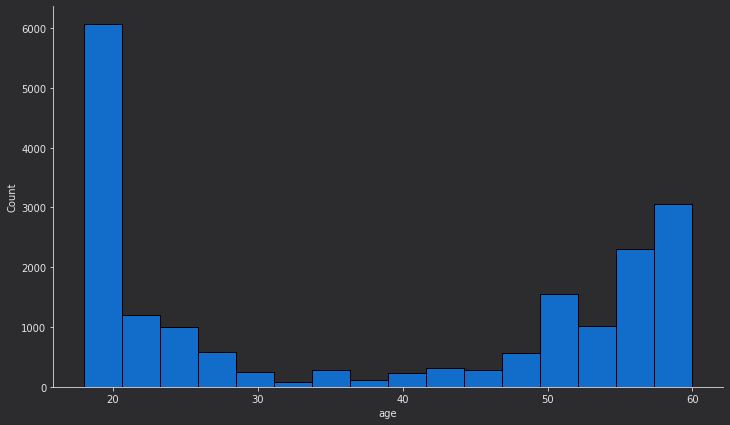

In [43]:
plt.figure(figsize=(12,7))
sns.histplot(new_train_df["age"])

In [44]:
new_train_df["age"].astype("int64").describe()

count    18900.000000
mean        37.708148
std         16.983208
min         18.000000
25%         20.000000
50%         36.000000
75%         55.000000
max         60.000000
Name: age, dtype: float64

In [45]:
new_train_df[(new_train_df["age_group"] == 2) & (new_train_df["age"] == 60)].head()

,id,gender,race,age,age_group,mask,image_path,label
273,004276,1,Asian,60,2,1,../input/data/train/images/004276_female_Asian...,11
274,004276,1,Asian,60,2,0,../input/data/train/images/004276_female_Asian...,5
275,004276,1,Asian,60,2,2,../input/data/train/images/004276_female_Asian...,17
276,004276,1,Asian,60,2,0,../input/data/train/images/004276_female_Asian...,5
277,004276,1,Asian,60,2,0,../input/data/train/images/004276_female_Asian...,5


#### 이미지 확인
- 올바르게 라벨링이 되어있는지 확인하기 위해 데이터 확인

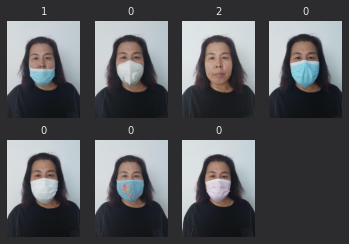

In [389]:
for i in range(7):
    plt.subplot(2,4,i+1)
    image = img.imread(new_train_df["image_path"][i])
    plt.title(new_train_df["mask"][i], fontsize=10)
    plt.axis('off')
    plt.imshow(image)

- inccorect, normal이 정상적으로 분류되었는지 확인하기

In [ ]:
test_data = new_train_df[new_train_df["mask"] != 0]
test_data.reset_index(inplace=True)
new_test_data = test_data[5200:5400]
new_test_data.reset_index(inplace=True)

In [3]:
plt.figure(figsize=(50,50))
for i in range(200):
    plt.subplot(10,20,i+1)
    image = img.imread(new_test_data["image_path"][i])
    plt.title((new_test_data["mask"][i],new_test_data['id'][i]),fontsize=20)
    plt.axis("off")
    plt.imshow(image)

- 잘못 분류된 id 명 살펴보기
- 000020, 004418, 005527

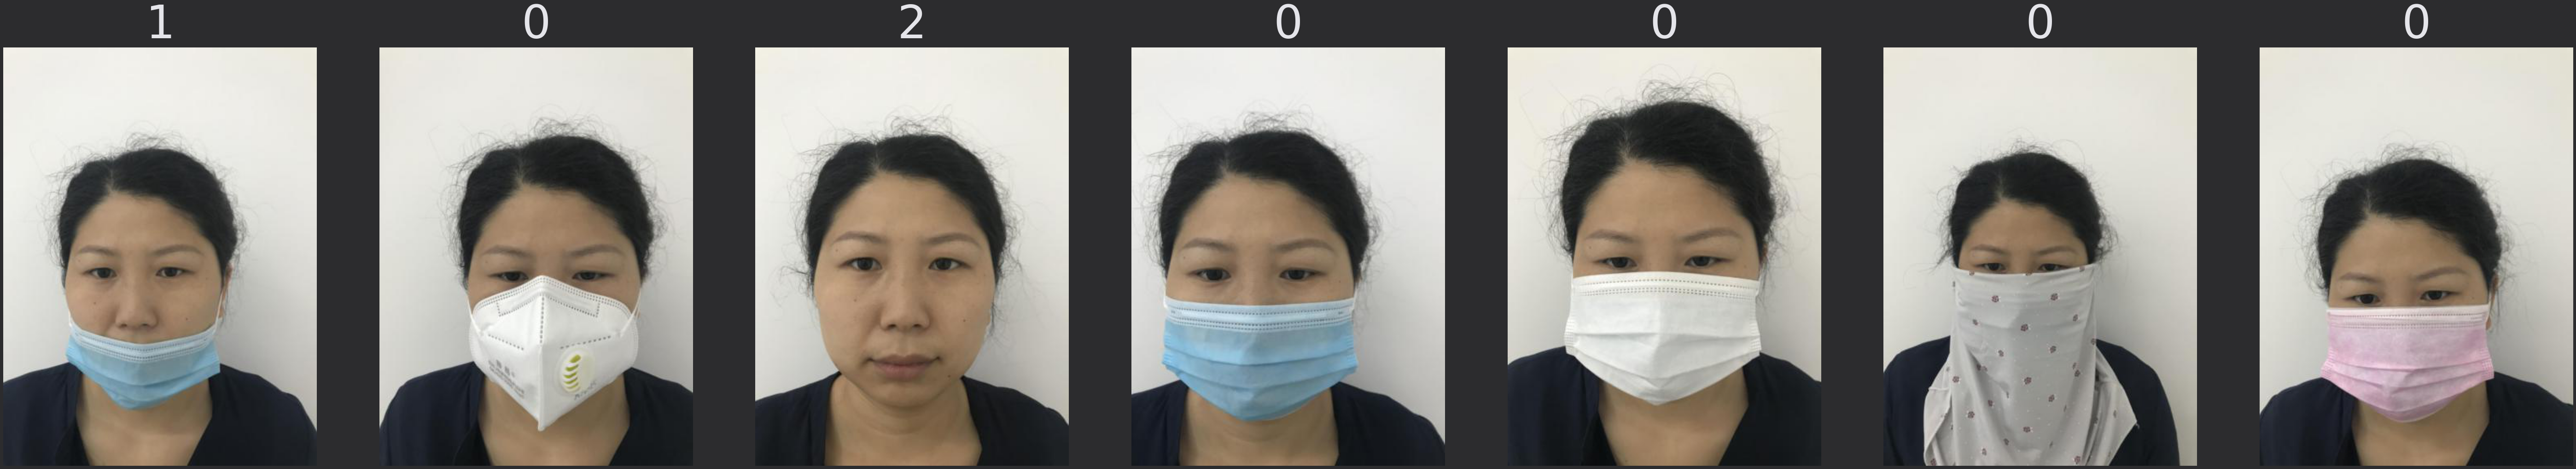

In [524]:
plt.figure(figsize=(100,100))
for i in range(7):
    plt.subplot(1,7,i+1)
    image = img.imread(list(new_train_df[new_train_df["id"] == "005527"]["image_path"])[i])
    plt.title(list(new_train_df[new_train_df["id"] == "000020"]["mask"])[i],fontsize=100)
    plt.axis("off")
    plt.imshow(image)